In [48]:
from qiskit.circuit import ParameterVector, QuantumCircuit,QuantumRegister
from qiskit.circuit.library import EfficientSU2

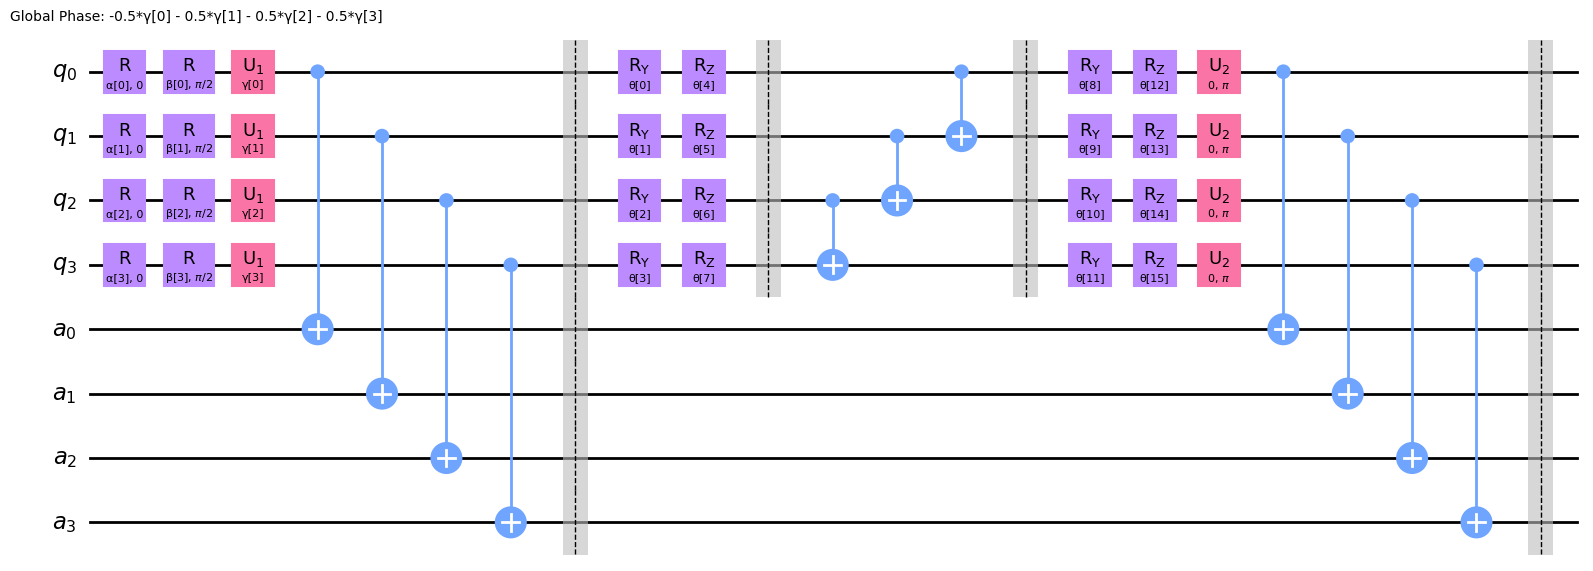

In [52]:
num_qubits = 4
qr = QuantumRegister(num_qubits, name="q")
ancilla = QuantumRegister(num_qubits, name="a")
qc = QuantumCircuit(qr, ancilla)
alpha = ParameterVector("α", num_qubits)
beta = ParameterVector("β", num_qubits)
gamma = ParameterVector("γ", num_qubits)

for i, a,b,c in zip(range(num_qubits),alpha, beta, gamma):
    qc.rx(a, qr[i])
    qc.ry(b, qr[i])
    qc.rz(c, qr[i])
qc.cx(qr,ancilla)
qc.barrier()
eff = EfficientSU2(num_qubits, reps=1, entanglement="reverse_linear", insert_barriers=True,name = "U").decompose()
qc.append(eff, qr[:])
qc.h(qr)
qc.cx(qr,ancilla)
qc.barrier()
qc.decompose().draw(output="mpl")


In [54]:
from qiskit.algorithms.gradients import ReverseEstimatorGradient
from qiskit.quantum_info import SparsePauliOp
import numpy as np

gradient = ReverseEstimatorGradient()
hamiltonian = SparsePauliOp.from_list([("ZIII", 1)])

result = gradient.run([qc],[hamiltonian^("I"*num_qubits)],parameter_values=[np.zeros(len(qc.parameters))] )
np.linalg.norm(result.result().gradients[0])

1.4142135623730934